In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, jaccard_similarity_score, classification_report, confusion_matrix, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import Ridge

from sklearn.pipeline import Pipeline


In [199]:
#Full the data
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"    
df = pd.read_csv(path)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
#checking the null value
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [200]:
# Define value of x and y
y = df['CO2EMISSIONS']
x = df[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']]

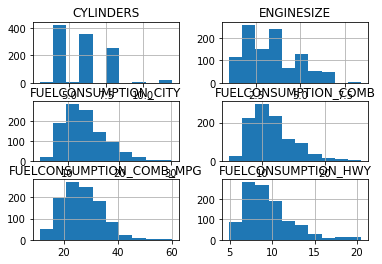

In [77]:
x.hist()
plt.show()

# Linear Regression:
#### Finding the relation b/w 'CO2EMISSIONS' and other values
-- 'ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG

In [63]:
# Split data into train and Test set:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print("Train: ", x_train.shape,y_train.shape)
print("Test: ",x_test.shape, y_test.shape)

Train:  (853, 6) (853,)
Test:  (214, 6) (214,)


In [50]:
# Case-1 ('ENGINESIZE')
x1 = x_train[['ENGINESIZE']]
y = y_train
lr_1 = LinearRegression()
lr_1.fit(x1,y)
print("Coef: ",lr_1.coef_)
print("Intercept: ",lr_1.intercept_)
print("Score: ",lr_1.score(x1,y))

Coef:  [39.24838431]
Intercept:  126.1892015472493
Score:  0.7748585292765848


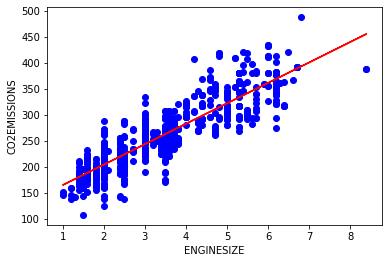

In [52]:
# Visuals:
plt.scatter(x1,y, color="blue")
plt.plot(x1,lr_1.predict(x1), color="Red")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [54]:
x1_test = x_test[["ENGINESIZE"]]
yhat_1 = lr_1.predict(x1_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test - yhat_1)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test - yhat_1) ** 2))
print("R2-score: %.2f" % r2_score(y_test, yhat_1))

Mean absolute error: 25.57
Residual sum of squares (MSE): 1181.53
R2-score: 0.72


#---------------------------

In [55]:
# Case-2 ('CYLINDERS')
x2 = x_train[['CYLINDERS']]
y = y_train
lr_2 = LinearRegression()
lr_2.fit(x2,y)
print("Score :",lr_2.score(x2,y))

Score : 0.7279199796046002


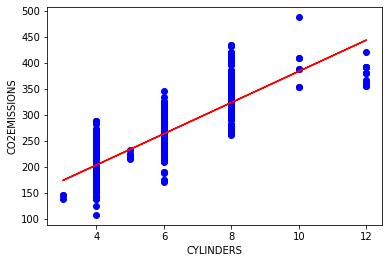

In [56]:
# Visuals 
plt.scatter(x2,y, color="Blue")
plt.plot(x2,lr_2.predict(x2), color='Red')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [57]:
x2_test = x_test[["CYLINDERS"]]
yhat_2 = lr_2.predict(x2_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test - yhat_2)))
print("Residual sum of squares (MSE): %.2f" %np.mean((y_test - yhat_2)**2))
print("R2-score: %.2f" % r2_score(y_test, yhat_2))

Mean absolute error: 28.19
Residual sum of squares (MSE): 1292.27
R2-score: 0.69


Score: 0.80


(0, 542.1537636207382)

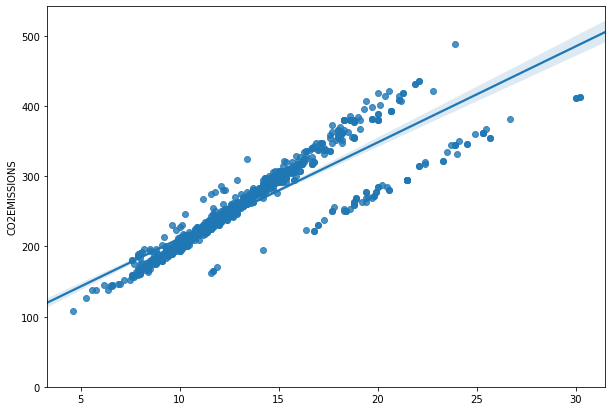

In [110]:
# Case-3 ('FUELCONSUMPTION_CITY')
x3 = x_train[['FUELCONSUMPTION_CITY']]
y = y_train
lr_3 = LinearRegression()
lr_3.fit(x3,y)
print("Score: %.2f" % lr_3.score(x3,y))

w = 10
h = 7
plt.figure(figsize=(w,h))
sns.regplot(x3 ,y)
plt.ylim(0,)

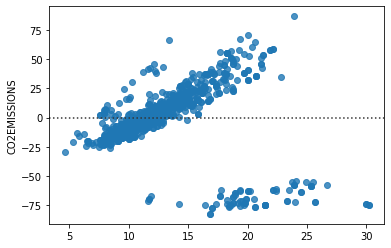

In [111]:
sns.residplot(x3,y)
plt.show()
# We can see from this residual plot that the residuals are randomly spread around the x-axis, which leads us to believe that maybe a linear model is  more appropriate for this data.

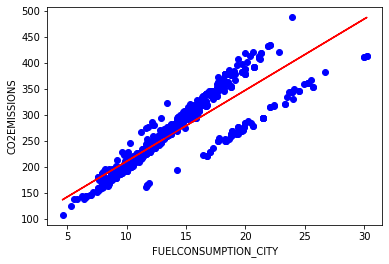

In [67]:
# visuals 
plt.scatter(x3,y, color='blue')
plt.plot(x3,lr_3.predict(x3),'red')
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [70]:
x3_test = x_test[["FUELCONSUMPTION_CITY"]]
yhat_3 = lr_3.predict(x3_test)

print("Mean Absolute Error: %.2f" % np.mean(np.absolute(y_test - yhat_3)))
print("Sum of Square Residuals: %.2f" % np.mean(y_test - yhat_3)**2)
print("r2 Score %.2f" % r2_score(y_test, yhat_3))

Absolute Mean error: 19.22
Sum of Square Residuals: 0.61
r2 Score 0.83


In [ ]:
# Case-4 ('FUELCONSUMPTION_HWY')

In [ ]:
# Case-5 ('FUELCONSUMPTION_COMB')

In [ ]:
# Case-6 ('FUELCONSUMPTION_COMB_MPG')

# Multi Linear Regression

In [202]:
# Standard Scaler 
col_name = ['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']   
x_mlr = pd.DataFrame(StandardScaler().fit(x).transform(x),columns=col_name )
x_mlr.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,-0.951292,-0.998969,-0.828558,-0.993341,-0.884304,0.878553
1,-0.668653,-0.998969,-0.511433,-0.635329,-0.568571,0.342734
2,-1.304591,-0.998969,-1.779932,-1.315552,-1.630581,2.887876
3,0.108606,0.114242,-0.145519,-0.134112,-0.138027,-0.193086
4,0.108606,0.114242,-0.291885,-0.277317,-0.281542,0.074824


In [177]:
# Train Test Split
x_train,x_test, y_train,y_test = train_test_split(x_mlr, y, test_size=0.20, random_state=0)
print("Train: ", x_train.shape,y_train.shape)
print("Test: ",x_test.shape, y_test.shape)

Train:  (853, 6) (853,)
Test:  (214, 6) (214,)


In [154]:
mlr = LinearRegression()
mlr.fit(x_train,y_train)
print("score: %.2f" % mlr.score(x_train,y_train))

score: 0.89


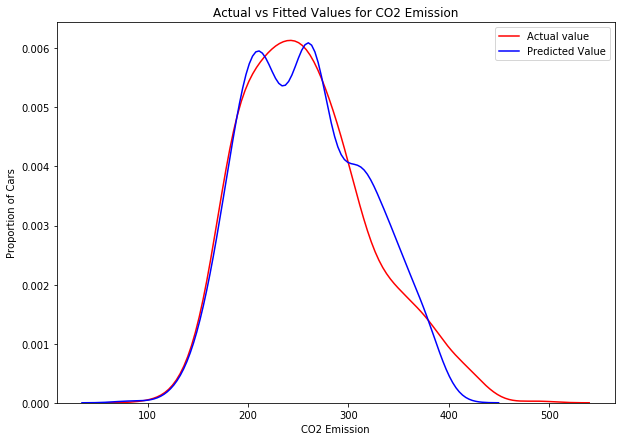

In [155]:
# Visuals
yhat_train = mlr.predict(x_train)

# Campare Actual and Predicted results
w , h = 10,7
plt.figure(figsize=(w, h))

ax1 = sns.distplot(y_train, hist=False, color="red", label = "Actual value")
sns.distplot(yhat_train, hist=False, color="blue", label="Predicted Value", ax= ax1)

plt.title('Actual vs Fitted Values for CO2 Emission')
plt.xlabel('CO2 Emission')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [156]:
yhat_m = mlr.predict(x_test)

print("Mean Absolute Error: %.2f" % np.mean(np.absolute(y_test - yhat_m)))
print("Sum of Square Residuals: %.2f" % np.mean(y_test - yhat_m)**2)
print("r2 Score %.2f" % r2_score(y_test, yhat_m))
print("Mean Squred Error %.2f" % mean_squared_error(y_test, yhat_m))

Mean Absolute Error: 13.84
Sum of Square Residuals: 3.79
r2 Score 0.90
Mean Squred Error 439.39


In [195]:
# Optimize Model using Ridge"
alpha = [-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10]
for i in alpha:
    RidgeModel = Ridge(alpha = (10)**i)
    RidgeModel.fit(x_train, y_train)
    RidgeModel.fit(x_test, y_test)
    print("Train Score: %.2f" % RidgeModel.score(x_train, y_train), RidgeModel.score(x_test, y_test), ((10)**i))

Train Score: 0.88 0.900245521571275 0.0001
Train Score: 0.88 0.9002453675124951 0.001
Train Score: 0.88 0.9002415613334184 0.01
Train Score: 0.88 0.9002339853844088 0.1
Train Score: 0.88 0.9002012457930793 1
Train Score: 0.88 0.8992872236716754 10
Train Score: 0.87 0.8888364303812331 100
Train Score: 0.69 0.7008138601736786 1000
Train Score: 0.17 0.17596159960628732 10000
Train Score: 0.01 0.020364976914810873 100000
Train Score: -0.01 0.002068472372430019 1000000
Train Score: -0.01 0.0002071718966953906 10000000
Train Score: -0.01 2.0720441248234248e-05 100000000
Train Score: -0.01 2.0720766457094086e-06 1000000000
Train Score: -0.01 2.072079898773893e-07 10000000000


In [203]:
# Model Evaluation:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, x_mlr, y, scoring='neg_mean_squared_error', cv=5))
    return(rmse)

min rmse: 21.23 


Text(0, 0.5, 'RMSE')

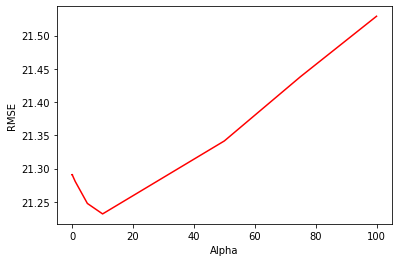

In [214]:
# For Model Ridge
alphas = [0.001,0.005,0.01,0.05, 0.1, 0,1, 5, 10,  50, 75, 100]
RidgeModel_score = [rmse_cv(Ridge(alpha=alpha)).mean() for alpha in alphas]
plt.plot(alphas,RidgeModel_score, color='red')
print("min rmse: %.2f " % min(RidgeModel_score))
plt.xlabel("Alpha")
plt.ylabel("RMSE")

RidgeCV Score : 0.89
--------------------------------------------------


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

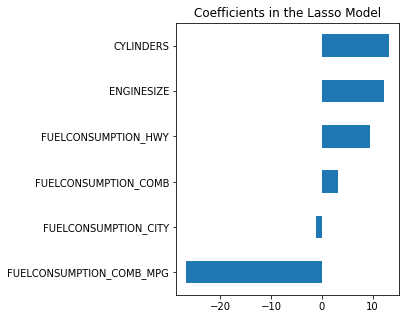

In [233]:
# For RidgeCV
alphas = [0.001,0.005,0.01,0.05, 0.1, 0,1, 5, 10,  50, 75, 100]
ridge_lr = RidgeCV(alphas,cv=5)
ridge_lr = ridge_lr.fit(x_mlr, y)
print("RidgeCV Score : %.2f" % ridge_lr.score(x_mlr, y))
print("-"*50)
# Coef visuals
coef = pd.Series(ridge_lr.coef_, index = x_mlr.columns).sort_values()
plt.rcParams['figure.figsize'] = (4.0, 5.0)
coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

# Polynomial Regression
-- 'ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB',
'FUELCONSUMPTION_COMB_MPG'

In [168]:
# Split data into train and Test set:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print("Train: ", x_train.shape,y_train.shape)
print("Test: ",x_test.shape, y_test.shape)

Train:  (853, 6) (853,)
Test:  (214, 6) (214,)


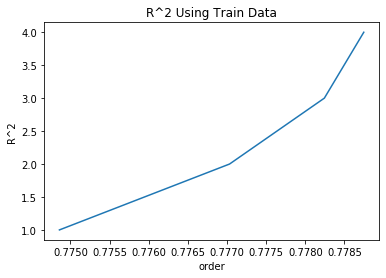

In [169]:
#case-1 ('ENGINESIZE')

x1 = x_train[['ENGINESIZE']]
y = y_train
plr = LinearRegression()
score = []
degree_val = []
for i in range(1,5):
    poly = PolynomialFeatures(degree=i)
    x1_poly = poly.fit_transform(x1)
    plr.fit(x1_poly,y)
    score.append(plr.score(x1_poly,y))
    degree_val.append(i)

plt.plot(score,degree_val)    
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Train Data')   
plt.show()

final_degree = np.argmax(score) + 1
print("Highest Score at degree: ", final_degree)
poly = PolynomialFeatures(final_degree)
x1_poly = poly.fit_transform(x1)
plr.fit(x1_poly,y)
print("Score %.2f" %plr.score(x1_poly,y))

In [170]:
x1_test = x_test[["ENGINESIZE"]]
x1_test_poly = poly.fit_transform(x1_test)
yhat_1 = plr.predict(x1_test_poly)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test - yhat_1)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test - yhat_1) ** 2))
print("R2-score: %.2f" % r2_score(y_test, yhat_1) )


Mean absolute error: 25.51
Residual sum of squares (MSE): 1177.14
R2-score: 0.72


In [ ]:
#case-2 ('CYLINDERS')

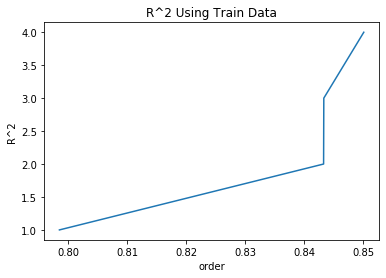

Highest Score at degree:  4
Score 0.85
Mean absolute error: 12.17
Residual sum of squares (MSE): 480.31
R2-score: 0.89


In [171]:
#case-3 ('FUELCONSUMPTION_CITY')
x1 = x_train[['FUELCONSUMPTION_CITY']]
y = y_train
plr = LinearRegression()
score = []
degree_val = []
for i in range(1,5):
    poly = PolynomialFeatures(degree=i)
    x1_poly = poly.fit_transform(x1)
    plr.fit(x1_poly,y)
    score.append(plr.score(x1_poly,y))
    degree_val.append(i)

plt.plot(score,degree_val)    
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Train Data')   
plt.show()
    
final_degree = np.argmax(score) + 1
print("Highest Score at degree: ", final_degree)
poly = PolynomialFeatures(final_degree)
x1_poly = poly.fit_transform(x1)
plr.fit(x1_poly,y)
print("Score %.2f" %plr.score(x1_poly,y))

x1_test = x_test[["FUELCONSUMPTION_CITY"]]
x1_test_poly = poly.fit_transform(x1_test)
yhat_1 = plr.predict(x1_test_poly)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test - yhat_1)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test - yhat_1) ** 2))
print("R2-score: %.2f" % r2_score(y_test, yhat_1) )


In [164]:
#case-4 ('FUELCONSUMPTION_HWY')

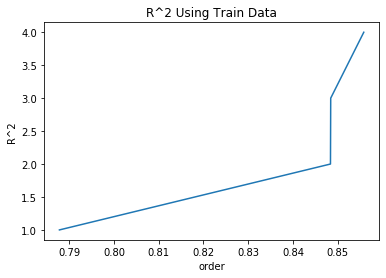

Highest Score at degree:  4
Score 0.86
Mean absolute error: 9.45
Residual sum of squares (MSE): 444.17
R2-score: 0.89


In [173]:
#case-5 ('FUELCONSUMPTION_COMB')
x1 = x_train[['FUELCONSUMPTION_COMB']]
y = y_train
plr = LinearRegression()
score = []
degree_val = []
for i in range(1,5):
    poly = PolynomialFeatures(degree=i)
    x1_poly = poly.fit_transform(x1)
    plr.fit(x1_poly,y)
    score.append(plr.score(x1_poly,y))
    degree_val.append(i)

plt.plot(score,degree_val)    
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Train Data')   
plt.show()
    
final_degree = np.argmax(score) + 1
print("Highest Score at degree: ", final_degree)
poly = PolynomialFeatures(final_degree)
x1_poly = poly.fit_transform(x1)
plr.fit(x1_poly,y)
print("Score %.2f" %plr.score(x1_poly,y))


x1_test = x_test[["FUELCONSUMPTION_COMB"]]
x1_test_poly = poly.fit_transform(x1_test)
yhat_1 = plr.predict(x1_test_poly)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test - yhat_1)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test - yhat_1) ** 2))
print("R2-score: %.2f" % r2_score(y_test, yhat_1) )


In [ ]:
#case-6 ('FUELCONSUMPTION_COMB_MPG')

# Pipeline  and Multi Features in Polynomial Regression

In [145]:
input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]   
pipe = Pipeline(input)
pipe.fit(x_train,y_train)

# Here polynomial features degree default is 2

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [143]:
yhat_train_p= pipe.predict(x_train)
yhat_p = pipe.predict(x_test)
print("r2_score: %.2f" % r2_score(y_test,yhat_p))
print("mean_squared_error: %.2f" % mean_squared_error(y_test,yhat_p))

r2_score: 0.92
mean_squared_error: 344.38


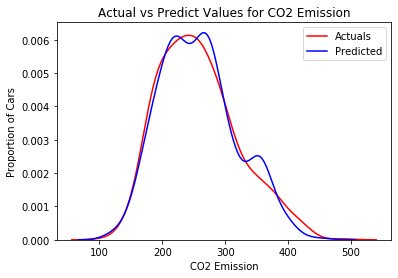

In [144]:
# Visuals for train set

ax1 = sns.distplot(y_train, hist=False, color='red', label='Actuals')
sns.distplot(yhat_train_p, hist=False, color='blue', label='Predicted', ax=ax1)
plt.title('Actual vs Predict Values for CO2 Emission')
plt.xlabel('CO2 Emission')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

Score: 0.92


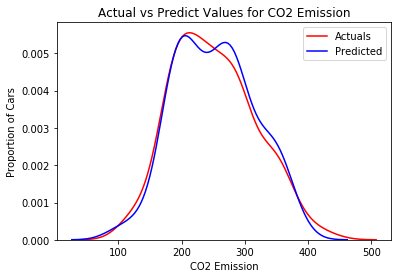

In [148]:
# Visuals for test set
print("Score: %.2f" % pipe.score(x_test,y_test))

ax1 = sns.distplot(y_test, hist=False, color='red', label='Actuals')
sns.distplot(yhat_p, hist=False, color='blue', label='Predicted', ax=ax1)
plt.title('Actual vs Predict Values for CO2 Emission')
plt.xlabel('CO2 Emission')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()